In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
Countries = ['India', 'World', 'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France', 'Brazil',
                      'S.Korea', 'Iran', 'Belgium', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
Other_Countries = ['Belgium', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'Germany',
       'India', 'Iran', 'Ireland', 'Italy', 'Mexico', 'Netherlands', 'Peru',
       'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'UK', 'World', 'S.Korea']
colors = {'India': 'Blue', 'World': 'Blue', 'World without China': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'lime', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal', 'Brazil': 'darkgreen', 'Belgium': 'cyan'}

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtConfirmed(DF2, name1, DF, name2 = 'Confirmed', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
Confirmed = DF

In [9]:
Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,62808,4024009,3940019,1309550,171324,218268,223578,83990,216525,176782,156061,10874,106220,52596,198676,33460,68918
2020-05-10,67161,4101699,4017689,1329260,171879,219070,224350,84010,220449,177094,162699,10909,107603,53081,209688,35022,70091
2020-05-11,70768,4177502,4093491,1347881,172576,219814,227436,84011,224332,177547,169594,10936,109286,53449,221344,36327,71264
2020-05-12,74292,4261747,4177729,1369376,173171,221216,228030,84018,227741,178349,178214,10962,110767,53779,232243,38324,72419
2020-05-13,78055,4347018,4262994,1390406,174098,222104,228691,84024,230985,178184,190137,10991,112725,53981,242271,40186,73568
2020-05-14,81997,4442163,4358134,1417774,174478,223096,229540,84029,234440,178994,203165,11018,114533,54288,252245,42595,74781
2020-05-15,85784,4542347,4458309,1442824,175233,223885,230183,84038,238004,179630,220291,11037,116635,54644,262843,45032,75959
2020-05-16,90648,4634068,4550024,1467820,175752,224760,230698,84044,241461,179630,233511,11050,118392,54989,272043,47144,77206
2020-05-17,95698,4713620,4629566,1486757,176369,225435,230698,84054,244995,179693,241080,11065,120198,55280,281752,49219,78332
2020-05-18,100328,4801943,4717880,1508308,176551,225886,231606,84063,247709,180051,255368,11078,122492,55559,290678,51633,79411


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


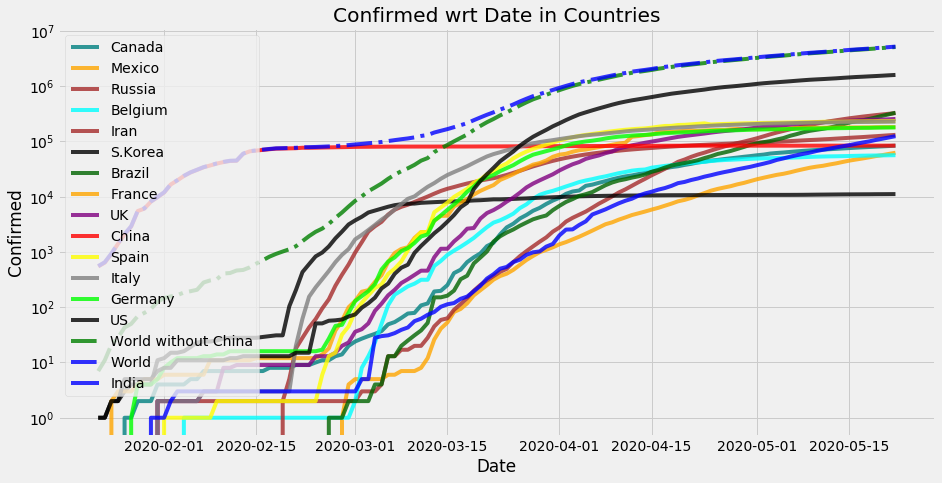

In [10]:
plotter(Confirmed, 'Confirmed')
Confirmed.transpose().to_csv('CSVs/Confirmed.csv')

In [11]:
Biweekly_Confirmed = np.round((Confirmed - Confirmed.shift(14))/14, 2)
Biweekly_Confirmed = Biweekly_Confirmed.fillna(0)#.astype('int')
Biweekly_Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,2608.93,81633.50,81627.71,26528.29,1057.93,1636.93,1262.36,5.79,4782.57,1081.29,6909.79,10.43,1206.57,519.36,8863.43,1401.29,1610.50
2020-05-10,2805.07,81904.71,81897.71,25962.50,1007.79,1528.21,1194.00,7.00,4743.71,1062.43,7114.21,12.21,1223.00,496.21,9195.64,1453.21,1575.57
2020-05-11,2951.21,82412.86,82406.21,25691.71,987.00,1457.14,1283.64,6.64,4713.14,827.43,7296.29,13.14,1272.43,483.00,9585.50,1485.57,1546.29
2020-05-12,3069.14,83179.86,83174.29,25485.29,947.07,1407.93,1232.64,5.57,4670.79,664.00,7498.50,14.36,1298.79,460.36,9906.07,1540.86,1519.21
2020-05-13,3213.79,83909.36,83903.64,25035.50,897.07,1322.36,1126.71,5.71,4610.29,831.50,7889.43,16.14,1362.00,437.29,10205.14,1599.07,1478.79
2020-05-14,3366.71,84660.93,84655.71,24882.14,819.21,1259.50,1150.36,5.21,4425.64,835.36,8284.14,17.43,1420.93,412.07,10410.50,1669.36,1451.71
2020-05-15,3466.21,85484.93,85479.29,24240.21,796.86,1175.50,1069.07,5.64,4237.07,880.36,9149.21,18.36,1499.21,400.86,10600.86,1735.21,1401.14
2020-05-16,3639.21,86177.43,86171.36,23948.64,770.36,1102.29,1008.29,6.07,4140.07,793.71,9743.64,18.36,1567.43,390.86,10570.64,1789.71,1377.14
2020-05-17,3799.50,86206.50,86200.07,23479.79,764.64,1051.29,945.14,6.43,4082.36,769.14,9946.71,18.86,1626.71,383.86,10504.64,1839.14,1273.43
2020-05-18,3849.36,87063.43,87056.50,23423.79,742.79,996.29,971.07,6.93,3991.21,747.71,10482.00,19.57,1703.21,378.00,10386.43,1909.14,1246.71


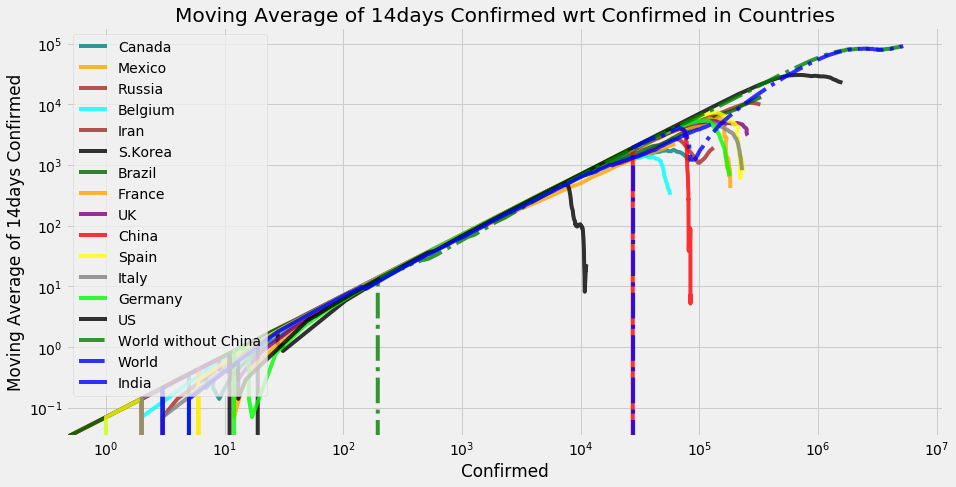

In [12]:
plotwrtConfirmed(Biweekly_Confirmed, 'Moving Average of 14days Confirmed', Confirmed)
Biweekly_Confirmed.transpose().to_csv('CSVs/Biweekly_Confirmed.csv')

In [13]:
Weekly_Confirmed = np.round((Confirmed - Confirmed.shift(7))/7)
Weekly_Confirmed = Weekly_Confirmed.fillna(0).astype('int')
Weekly_Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,3301,85204,85199,25287,908,1277,999,4,4718,1181,8423,12,1396,440,10660,1625,1570
2020-05-10,3522,84996,84989,24460,888,1193,983,7,4658,1167,8696,15,1454,454,10714,1650,1370
2020-05-11,3476,84921,84915,23929,918,1125,1346,6,4643,1138,8711,19,1520,455,10868,1632,1330
2020-05-12,3556,85579,85572,23575,881,1172,1243,7,4500,1095,8966,22,1542,467,10982,1757,1315
2020-05-13,3581,84421,84414,23011,848,1092,1195,8,4089,566,9075,26,1582,457,10906,1793,1268
2020-05-14,3664,85206,85199,22964,721,1034,1156,8,3780,582,9627,28,1628,410,10726,1854,1226
2020-05-15,3727,86326,86317,22699,664,957,1047,9,3625,490,10485,28,1706,376,10712,1930,1184
2020-05-16,3977,87151,87144,22610,633,927,1017,8,3562,407,11064,25,1739,342,10481,1955,1184
2020-05-17,4077,87417,87411,22500,641,909,907,6,3507,371,11197,22,1799,314,10295,2028,1177
2020-05-18,4223,89206,89198,22918,568,867,596,7,3340,358,12253,20,1887,301,9905,2187,1164


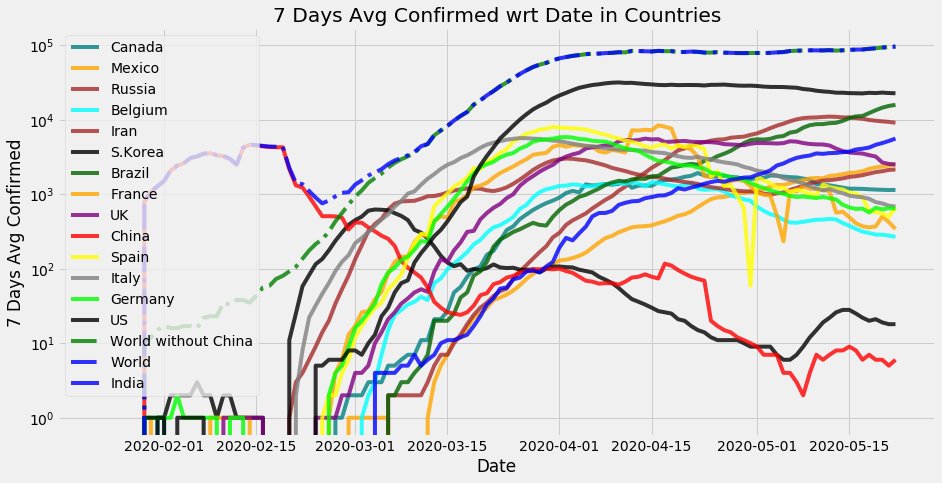

In [14]:
plotter(Weekly_Confirmed, '7 Days Avg Confirmed')

In [15]:
ThreeDaysConfirmed = np.round((Confirmed - Confirmed.shift(3))/3)
ThreeDaysConfirmed = ThreeDaysConfirmed.fillna(0).astype('int')
ThreeDaysConfirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,3274,89313,89307,26740,1054,1270,1084,7,4722,853,9817,21,1523,605,10916,1942,1408
2020-05-10,3603,85327,85315,24079,816,1071,968,12,4157,725,8975,29,1489,554,10843,1802,1297
2020-05-11,3691,79813,79801,21317,663,876,1526,12,3901,448,7567,32,1532,479,11162,1602,1197
2020-05-12,3828,79246,79237,19942,616,983,1484,9,3739,522,7384,29,1516,394,11189,1621,1167
2020-05-13,3631,81773,81768,20382,740,1011,1447,5,3512,363,9146,27,1707,300,10861,1721,1159
2020-05-14,3743,88220,88214,23298,634,1094,701,6,3369,482,11190,27,1749,280,10300,2089,1172
2020-05-15,3831,93533,93527,24483,687,890,718,7,3421,427,14026,25,1956,288,10200,2236,1180
2020-05-16,4198,95683,95677,25805,551,885,669,7,3492,482,14458,20,1889,336,9924,2319,1213
2020-05-17,4567,90486,90477,22994,630,780,386,8,3518,233,12638,16,1888,331,9836,2208,1184
2020-05-18,4848,86532,86524,21828,439,667,474,8,3235,140,11692,14,1952,305,9278,2200,1151


In [16]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,3113,85945,85931,25621,736,1083,721,14,3896,580,9167,34,1529,585,10817,1938,1244
2020-05-10,4353,77690,77670,19710,555,802,772,20,3924,312,6638,35,1383,485,11012,1562,1173
2020-05-11,3607,75803,75802,18621,697,744,3086,1,3883,453,6895,27,1683,368,11656,1305,1173
2020-05-12,3524,84245,84238,21495,595,1402,594,7,3409,802,8620,26,1481,330,10899,1997,1155
2020-05-13,3763,85271,85265,21030,927,888,661,6,3244,-165,11923,29,1958,202,10028,1862,1149
2020-05-14,3942,95145,95140,27368,380,992,849,5,3455,810,13028,27,1808,307,9974,2409,1213
2020-05-15,3787,100184,100175,25050,755,789,643,9,3564,636,17126,19,2102,356,10598,2437,1178
2020-05-16,4864,91721,91715,24996,519,875,515,6,3457,0,13220,13,1757,345,9200,2112,1247
2020-05-17,5050,79552,79542,18937,617,675,0,10,3534,63,7569,15,1806,291,9709,2075,1126
2020-05-18,4630,88323,88314,21551,182,451,908,9,2714,358,14288,13,2294,279,8926,2414,1079


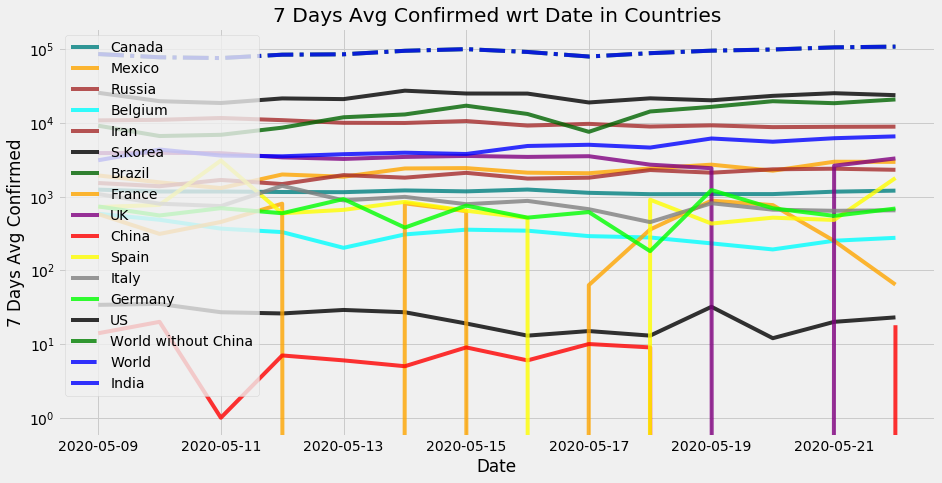

In [17]:
plotter(Daily_Confirmed.tail(14), '7 Days Avg Confirmed', scale = 'log')
Daily_Confirmed.transpose().to_csv('CSVs/Daily_Confirmed.csv')

In [18]:
Reproductivity = np.round(Weekly_Confirmed/Biweekly_Confirmed.shift(10), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India                  1.8158
World                  1.1481
World without China    1.1481
US                     0.8863
Germany                0.6758
Italy                  0.4844
Spain                  0.5379
China                  1.0772
UK                     0.5365
France                 0.5136
Brazil                 2.1071
S.Korea                1.2535
Iran                   1.6515
Belgium                0.5800
Russia                 0.9172
Mexico                 1.6218
Canada                 0.7510
Name: 2020-05-22 00:00:00, dtype: float64

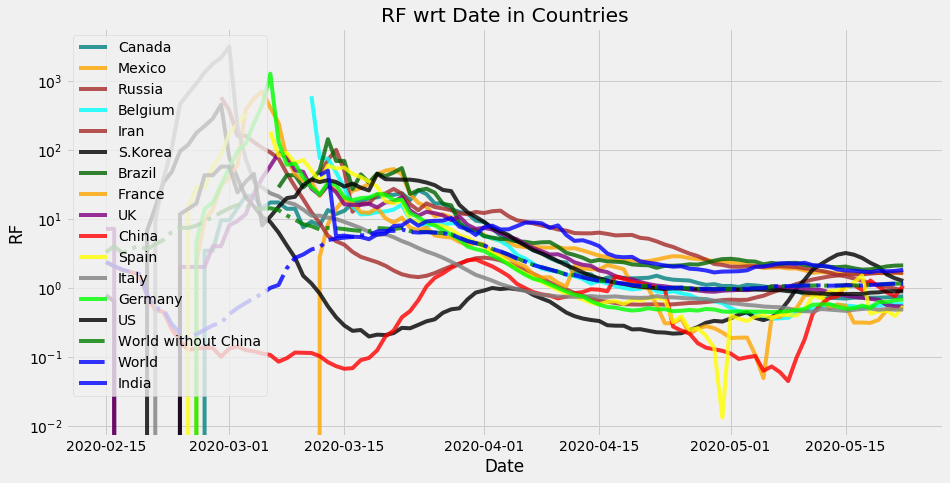

In [19]:
plotter(Reproductivity, 'RF')
Reproductivity.transpose().to_csv('CSVs/Reproductivity.csv')

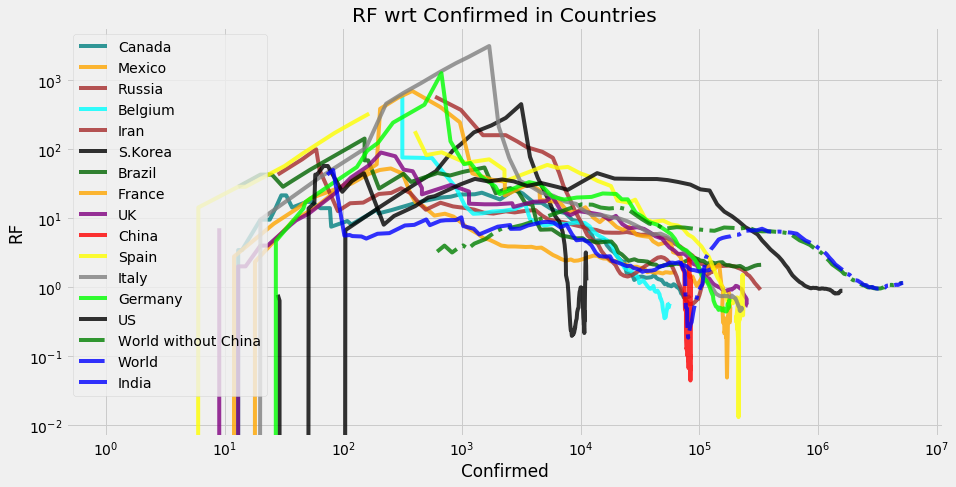

In [20]:
plotwrtConfirmed(Reproductivity, 'RF', Confirmed)

In [21]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Confirmed.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [22]:
D = {
    'Confirmed':Confirmed,
    'Biweekly Confirmed':Biweekly_Confirmed,
    'Weekly Confirmed': Weekly_Confirmed,
    'Triday Confirmed': ThreeDaysConfirmed,
    'Daily Confirmed':Daily_Confirmed,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Confirmed>=100000]

In [23]:
LastDay_DF.sort_values('Confirmed', ascending = False)#.head(20)

,Confirmed,Biweekly Confirmed,Weekly Confirmed,Triday Confirmed,Daily Confirmed,Reproductive Factor
Country,,,,,,
World,5210817,90910.93,95496,104442,108393,1.1481
World without China,5126736,90903.43,95490,104436,108375,1.1481
US,1600937,22643.43,22588,24123,23790,0.8863
Brazil,330890,13142.57,15800,19668,20803,2.1071
Russia,326448,9899.21,9086,8836,8894,0.9172
UK,255544,3065.36,2506,1802,3298,0.5365
Spain,234824,854.79,663,929,1787,0.5379
Italy,228658,819.50,682,653,652,0.4844
France,182015,415.21,341,361,64,0.5136


In [24]:
Growth = np.round(Weekly_Confirmed/Confirmed, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,0.0526,0.0212,0.0216,0.0193,0.0053,0.0059,0.0045,0.0000,0.0218,0.0067,0.0540,0.0011,0.0131,0.0084,0.0537,0.0486,0.0228
2020-05-10,0.0524,0.0207,0.0212,0.0184,0.0052,0.0054,0.0044,0.0001,0.0211,0.0066,0.0534,0.0014,0.0135,0.0086,0.0511,0.0471,0.0195
2020-05-11,0.0491,0.0203,0.0207,0.0178,0.0053,0.0051,0.0059,0.0001,0.0207,0.0064,0.0514,0.0017,0.0139,0.0085,0.0491,0.0449,0.0187
2020-05-12,0.0479,0.0201,0.0205,0.0172,0.0051,0.0053,0.0055,0.0001,0.0198,0.0061,0.0503,0.0020,0.0139,0.0087,0.0473,0.0458,0.0182
2020-05-13,0.0459,0.0194,0.0198,0.0165,0.0049,0.0049,0.0052,0.0001,0.0177,0.0032,0.0477,0.0024,0.0140,0.0085,0.0450,0.0446,0.0172
2020-05-14,0.0447,0.0192,0.0195,0.0162,0.0041,0.0046,0.0050,0.0001,0.0161,0.0033,0.0474,0.0025,0.0142,0.0076,0.0425,0.0435,0.0164
2020-05-15,0.0434,0.0190,0.0194,0.0157,0.0038,0.0043,0.0045,0.0001,0.0152,0.0027,0.0476,0.0025,0.0146,0.0069,0.0408,0.0429,0.0156
2020-05-16,0.0439,0.0188,0.0192,0.0154,0.0036,0.0041,0.0044,0.0001,0.0148,0.0023,0.0474,0.0023,0.0147,0.0062,0.0385,0.0415,0.0153
2020-05-17,0.0426,0.0185,0.0189,0.0151,0.0036,0.0040,0.0039,0.0001,0.0143,0.0021,0.0464,0.0020,0.0150,0.0057,0.0365,0.0412,0.0150
2020-05-18,0.0421,0.0186,0.0189,0.0152,0.0032,0.0038,0.0026,0.0001,0.0135,0.0020,0.0480,0.0018,0.0154,0.0054,0.0341,0.0424,0.0147


In [31]:
def days100(DF):
    X = pd.DataFrame(list(DF['World']))
    for col in Countries:
        df = pd.Series(list(DF[Confirmed[col]>100][col]))
        #df = DF[col]>100
        X[col] = df
    X = X[Countries]
    X = X[[c for c in Countries if c not in ['World', 'China']]]
    return X

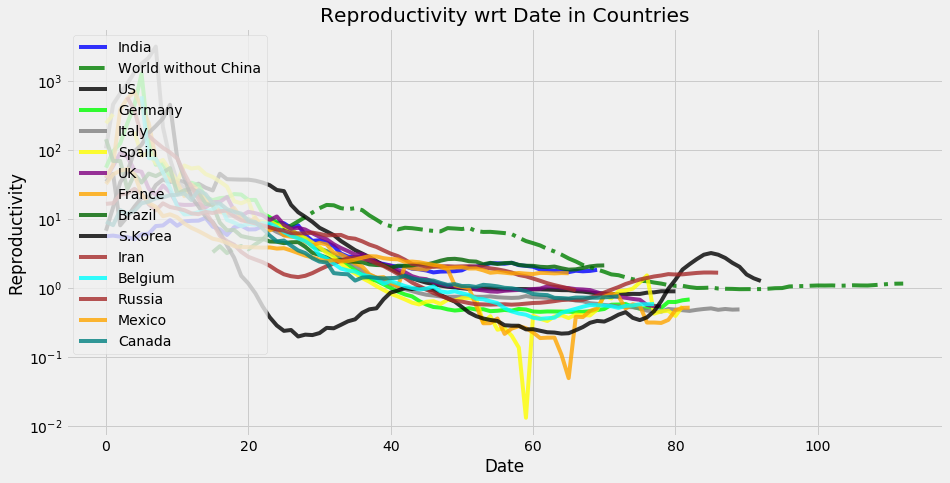

In [32]:
RF = days100(Reproductivity)
plotter(RF, 'Reproductivity', col = 'all')
RF.transpose().to_csv('CSVs/RF50.csv')

In [33]:
LastDay_DF.index

Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Congo (Kinshasa)',
       'Cote d'Ivoire', 'Croatia', 'Cuba', 'Czechia', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'S.Korea', 'Kuwait', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Moldova', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Senega

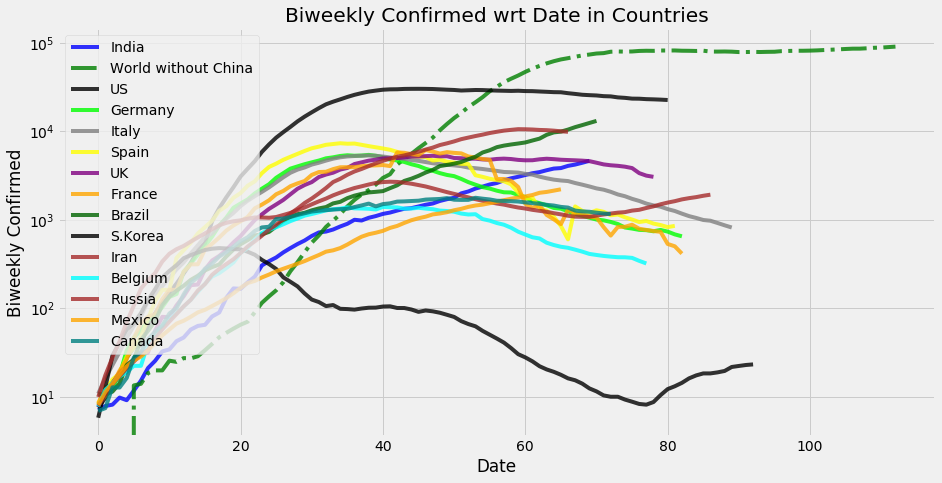

In [34]:
BD = days100(Biweekly_Confirmed)
plotter(BD, 'Biweekly Confirmed', col = 'all')
BD.transpose().to_csv('CSVs/BiweeklyConfirmed50.csv')

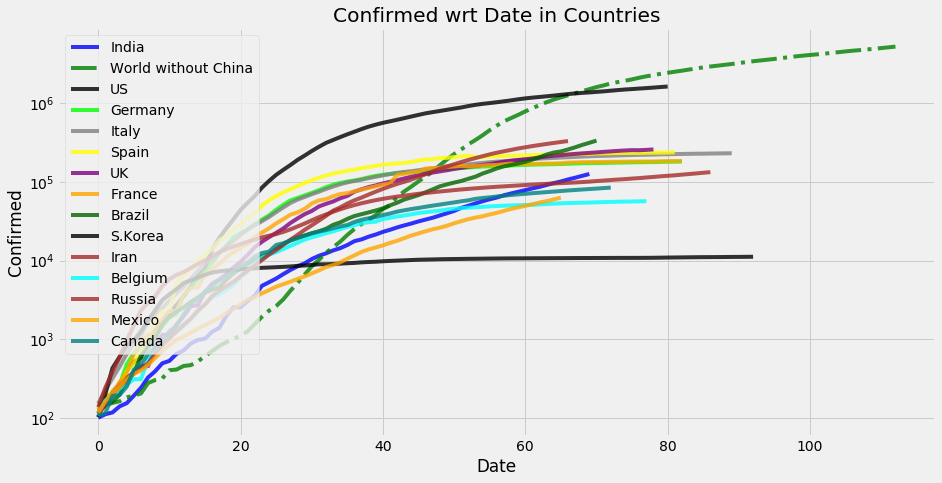

In [35]:
D = days100(Confirmed)
plotter(D, 'Confirmed', col = 'all')
D.transpose().to_csv('CSVs/Confirmed50.csv')

In [36]:
Dates = pd.DataFrame(list(Confirmed.World))
Dates.index = Confirmed.index
for col in Confirmed.columns:
    Dates[col] = Confirmed.index
    pd.to_datetime(Dates[col])
Dates = days100(Dates)
Dates.transpose().to_csv('CSVs/Dates50.csv')